##Uploading Data

In [48]:

import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
csvfile = 'drive/My Drive/Colab Notebooks/news.csv'
news=pd.read_csv(csvfile, encoding='latin-1')

In [50]:
news.head()

,Unnamed: 0,authors,title,publish_date,time,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,3/27/20,8:00:00 AM,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,3/27/20,1:45:00 AM,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,3/26/20,5:13:00 AM,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,3/27/20,12:36:00 PM,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,3/26/20,8:57:00 AM,The latest on the coronavirus outbreak from CB...,æ Trudeau says rules of Quarantine Act will...,https://www.cbc.ca/news/the-latest-on-the-coro...


In [51]:
news.tail()

,Unnamed: 0,authors,title,publish_date,time,description,text,url
3563,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,12/23/15,9:07:00 AM,South Korea on Wednesday declared a formal end...,South Korea on Wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...
3564,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,1/28/14,4:07:00 AM,The spread of MERS coronavirus infections in h...,The spread of MERS coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...
3565,4606,['Cbc News'],Ellershausen Manor is for sale,11/2/12,1:24:00 AM,A clasic old home with a lot of history in now...,"It's a relic of a bygone era, when wealthy Nov...",https://www.cbc.ca/news/canada/nova-scotia/ell...
3566,4607,['Cbc News'],MERS virus from camels and humans called indis...,4/29/14,4:57:00 AM,Camels have been implicated in a Middle Easter...,Camels have been implicated in a Middle Easter...,https://www.cbc.ca/news/health/mers-virus-from...
3567,4608,['The Canadian Press'],"WHO team, including Canadian, investigates how...",6/4/13,9:35:00 AM,A World Health Organization-led group of exper...,A World Health Organization-led group of exper...,https://www.cbc.ca/news/health/who-team-includ...


In [52]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3567 non-null   object
 1   authors       3567 non-null   object
 2   title         3566 non-null   object
 3   publish_date  3566 non-null   object
 4   time          3566 non-null   object
 5   description   3566 non-null   object
 6   text          3566 non-null   object
 7   url           3565 non-null   object
dtypes: object(8)
memory usage: 223.1+ KB


In [53]:
news.describe()

,Unnamed: 0,authors,title,publish_date,time,description,text,url
count,3567,3567,3566,3566,3566,3566,3566,3565
unique,3567,262,2721,109,678,2740,2755,2816
top,3294,[],Get informed on the top stories of the day in ...,3/20/20,8:00:00 AM,CBC Ottawa's latest roundup of key points to k...,A generation of older American voters that alr...,https://www.cbc.ca/news/canada/nova-scotia/can...
freq,1,1177,42,226,253,7,6,4


##Looking at authors

In [54]:
news.groupby('authors').count()

,Unnamed: 0,title,publish_date,time,description,text,url
authors,,,,,,,
"[""Alex Migdal Is A Journalist With Cbc News In Vancouver. He'S Previously Reported For The Globe"", 'Mail', 'Guelph Mercury', 'Edmonton Journal. You Can Reach Him At Alex.Migdal Cbc.Ca.', 'Twitter', 'More Stories']",1,1,1,1,1,1,1
"[""Ashley Burke Is A Senior Reporter With Cbc'S Parliamentary Bureau. Have A Story Idea"", 'Email Her At Ashley.Burke Cbc.Ca']",1,1,1,1,1,1,1
"[""David Thurton Is A National Reporter In Cbc'S Parliamentary Bureau. He'S Worked For Cbc In Fort Mcmurray"", 'The Maritimes', ""In Canada'S Arctic.""]",1,1,1,1,1,1,1
"[""Dr. Tito Daodu Is A Pediatric Surgery Fellow At The Alberta Children S Hospital. She Is Currently Completing A Master'S Degree In Public Health At The Harvard T.H. Chan School Of Public Health. Dr. Daodu Is Actively Involved In Global"", 'Public Health Research With A Focus On Improving Surgical Outcomes', 'Making Surgical Care More Accessible In Canada', 'Around The World.']",1,1,1,1,1,1,1
"[""Jessica Deer Is Kanien Kehíç Ka Kahnawake. She Works In Cbc'S Indigenous Unit Based In Montreal. Email Her At Jessica.Deer Cbc.Ca Or Follow Her On Twitter""]",6,6,6,6,6,6,6
...,...,...,...,...,...,...,...
['Winnipeg Free Press'],5,5,5,5,5,5,5
"['Wyatt James Schierman Is A Freelance Writer Alberta', 'A Regular Columnist With Loonie Politics. His Writing Has Also Been Published In The Ottawa Citizen', 'The Toronto Star', 'The Calgary Herald', 'Huffington Post Canada', 'The Hill Times. When He Is Not Writing', 'Wyatt Is Traveling Abroad As An Election Observer.']",1,1,1,1,1,1,1
['Yvette Brend Is A Cbc Vancouver Journalist. Yvette.Brend Cbc.Ca'],8,8,8,8,8,8,8


In [55]:
author=pd.read_csv('drive/My Drive/Colab Notebooks/author_cl.csv')
author.head()

,AUTHOR
0,Alex Migdal
1,Ashley Burke
2,David Thurton
3,Dr. Tito Daodu
4,Jessica Deer


In [56]:
author['author_num'] = "1"
df = author.groupby("AUTHOR").count()
df

,author_num
AUTHOR,
A.T. Kingsmith,1
Aarti Pole,2
Adam Carter,4
Adam Hunter,12
Aidan Geary,2
...,...
Web Journalist',1
Web Writer',15
Winnipeg Free Press',5


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24589 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24589 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 7200x7200 with 0 Axes>

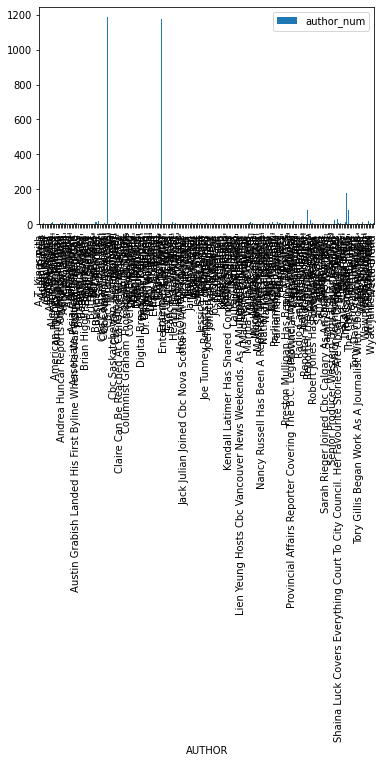

In [58]:
plt.figure(figsize=(100, 100))
df.plot(kind="bar")


##Sum of articles over time

In [59]:
#sum articles over time 
news["publish_date"] = pd.to_datetime(news["publish_date"], errors='coerce')
news_2020 = news[news['publish_date'] >= '2020-01-01']
news_2020['article_count'] = 1
# news.head()
pivoted = news_2020.pivot_table(index='publish_date', values='article_count', aggfunc=sum)
pivoted

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,article_count
publish_date,
2020-01-08,1
2020-01-09,2
2020-01-11,2
2020-01-12,1
2020-01-13,1
...,...
2020-03-23,190
2020-03-24,192
2020-03-25,200


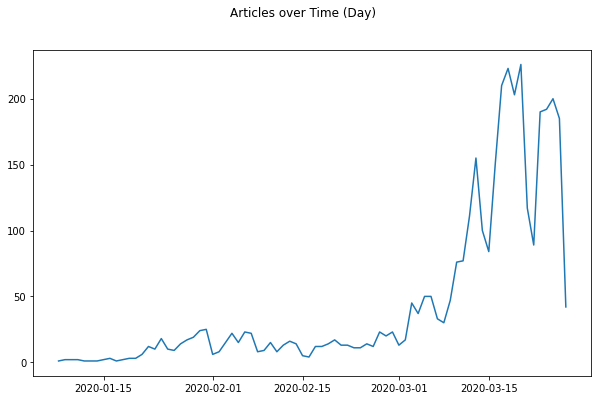

In [60]:
import matplotlib.pyplot as plt
x = pivoted.index
fig, ax1 = plt.subplots(1, figsize=(10,6), sharex='all')
fig.suptitle('Articles over Time (Day)')
ax1.plot(x, pivoted['article_count'])

In [0]:
#sum number of articles per week 
news_2020.index = news_2020['publish_date']
weekly_count = news_2020.resample('W').sum()

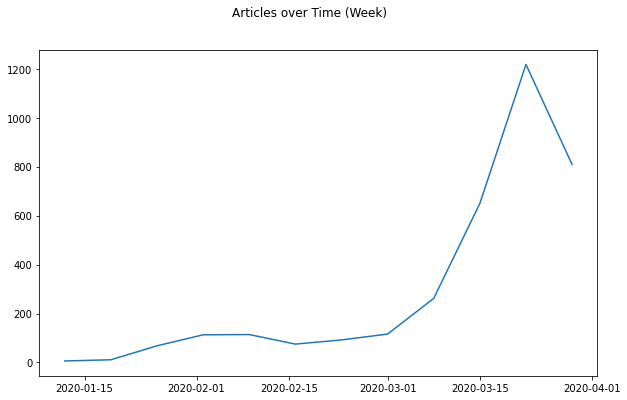

In [62]:
x = weekly_count.index
fig, ax1 = plt.subplots(1, figsize=(10,6), sharex='all')
fig.suptitle('Articles over Time (Week)')
ax1.plot(x, weekly_count['article_count'])

##Merging datasets

In [0]:
csvfile = 'drive/My Drive/Colab Notebooks/time_series_covid_19_confirmed.csv'
confirmed=pd.read_csv(csvfile, encoding='latin-1')

In [64]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25


In [65]:
result_df = pd.concat([news, confirmed], axis=1)

print(result_df.head())

  Unnamed: 0                   authors  ... 4/22/20 4/23/20
0          0              ['Cbc News']  ...  1176.0  1279.0
1          1              ['Cbc News']  ...   634.0   663.0
2          2  ['The Associated Press']  ...  2910.0  3007.0
3          3              ['Cbc News']  ...   723.0   723.0
4          4              ['Cbc News']  ...    25.0    25.0

[5 rows x 105 columns]
